# Assignment 2

## Name: Laasya Ojaswini Bulusu
## Reg. no.: 20MIC0065
## Campus: VIT, Vellore

### Import for the assignment

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Task 1: 
Read the dataset and do data pre-processing.

In [2]:
dataset = pd.read_csv('drug200.csv')
dataset.loc[0].to_list()

[23, 'F', 'HIGH', 'HIGH', 25.355, 'DrugY']

### Data pre-processing

In [3]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
dataset.shape

(200, 6)

In [5]:
dataset.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
dataset.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
dataset['Drug'].unique()  

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [9]:
dataset['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

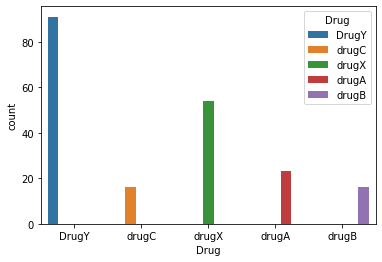

In [10]:
sb.countplot(x='Drug',data=dataset,hue='Drug')

### Train-test split and Label Encoding

In [11]:
X = dataset.drop(columns = ['Drug'],axis=1)
Y = dataset['Drug']

In [12]:
Y_class = len(np.unique(Y))
print(Y_class)

5


In [13]:
X = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)

LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3,random_state=2)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Task 2: 
Build ANN model with input model, min 3 hidden layers and an output model

In [16]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [17]:
# Initializing the seq model
model = Sequential()
# Adding the input layer to the model
model.add(Dense(48, input_dim=6, activation='relu'))
# Adding the 1st hidden layer to the model
model.add(Dense(36, activation='relu'))
# Adding the 2nd hidden layer to the model
model.add(Dense(24, activation='relu'))
# Adding the 3rd hidden layer to the model
model.add(Dense(12, activation='relu'))
# Adding output layer
output_layer = Dense(Y_class,activation='softmax')
model.add(output_layer)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(X_train,Y_train,epochs=48,batch_size=6,validation_data=(X_test,Y_test))

Epoch 1/48
24/24 [==============================] - 3s 27ms/step - loss: 1.5838 - accuracy: 0.2571 - val_loss: 1.5370 - val_accuracy: 0.4000
Epoch 2/48
24/24 [==============================] - 0s 7ms/step - loss: 1.4596 - accuracy: 0.6214 - val_loss: 1.3839 - val_accuracy: 0.6167
Epoch 3/48
24/24 [==============================] - 0s 7ms/step - loss: 1.2687 - accuracy: 0.5500 - val_loss: 1.1505 - val_accuracy: 0.6667
Epoch 4/48
24/24 [==============================] - 0s 8ms/step - loss: 1.0453 - accuracy: 0.5643 - val_loss: 0.9441 - val_accuracy: 0.7000
Epoch 5/48
24/24 [==============================] - 0s 8ms/step - loss: 0.8111 - accuracy: 0.7571 - val_loss: 0.8186 - val_accuracy: 0.6667
Epoch 6/48
24/24 [==============================] - 0s 7ms/step - loss: 0.6371 - accuracy: 0.7786 - val_loss: 0.7621 - val_accuracy: 0.6500
Epoch 7/48
24/24 [==============================] - 0s 7ms/step - loss: 0.5176 - accuracy: 0.8214 - val_loss: 0.6853 - val_accuracy: 0.7167
Epoch 8/48
24/24 [=

In [21]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 0s/step - loss: 0.3995 - accuracy: 0.9000
Test accuracy: 89.99999761581421


## Test 3:
Test the model with random data

In [22]:
Y_pred = model.predict([[23, 0, 1, 1, 25.355, 3]])
print(Y_pred)
Y_pred = np.argmax(Y_pred)
output = ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']
output[Y_pred]

1/1 [==============================] - 0s 270ms/step
[[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 8.095846e-29]]


'DrugY'